In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def GaussianKernel(v1,v2,sigma):
  res=

In [ ]:
import numpy as np
from scipy.io import loadmat
data=loadmat('/content/drive/MyDrive/기계학습/data1.mat')
print(data)
X=data['X']
y=data['y']
m=len(y)
print(X.shape, y.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011', '__version__': '1.0', '__globals__': [], 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  ,

In [ ]:
pos=[]
neg=[]
for (i,val) in enumerate(y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


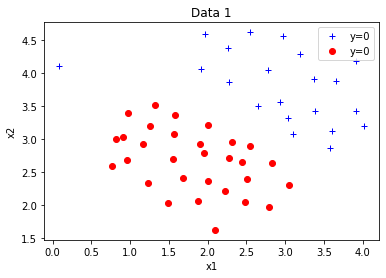

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='y=0')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')
plt.title("Data 1")
plt.show()

## 3)학습

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf=Pipeline([
                  ("scaler",StandardScaler()),
                  ("linear_svc",LinearSVC(C=1,loss="hinge"))
])
svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[2.3,2.7],
                 [3.7,3.9]])

array([0, 1], dtype=uint8)

## 4)Decision boundary

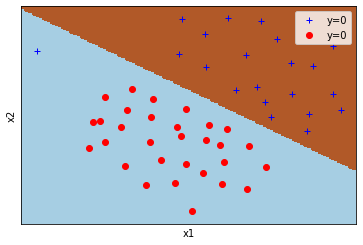

In [ ]:
x_min,x_max=X[:,0].min()-0.2,X[:,0].max()+0.2
y_min,y_max=X[:,1].min()-0.2,X[:,1].max()+0.2
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='y=0')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# 3.비선형 SVM 분류

In [ ]:
import numpy as np
from scipy.io import loadmat
data=loadmat("/content/drive/MyDrive/기계학습/data2.mat")
print(data)
X=data['X']
y=data['y']
m=len(y)
print(X.shape,y.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]]), 'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
     

In [ ]:
pos=[]
neg=[]
for (i,val) in enumerate(y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,

## 2)그래프

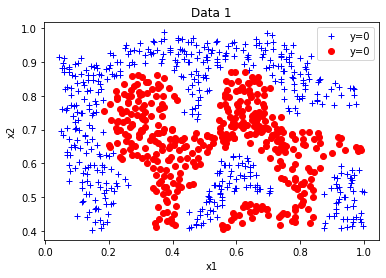

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='y=0')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')
plt.title("Data 1")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf=Pipeline([
                  ("scaler",StandardScaler()),
                  ("linear_svc",SVC(kernel="rbf",gamma=10,C=1))
])
svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=10, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

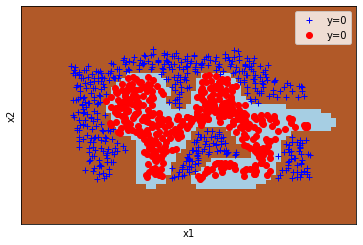

In [ ]:
x_min,x_max=X[:,0].min()-0.2,X[:,0].max()+0.2
y_min,y_max=X[:,1].min()-0.2,X[:,1].max()+0.2
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='y=0')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()